# **1. Data Preparation**

In [1]:
# Download COCO dataset (e.g., 2017 train set)
!mkdir -p datasets/coco
!curl -L "http://images.cocodataset.org/zips/train2017.zip" -o datasets/coco/train2017.zip
!unzip -q datasets/coco/train2017.zip -d datasets/coco/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  88.7M      0  0:03:27  0:03:27 --:--:--  105M


**Preprocessing images**

In [2]:
import cv2
import os

# Resize and normalize images
input_folder = "datasets/coco/train2017"
output_folder = "datasets/coco/processed"

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    image_path = os.path.join(input_folder, filename)
    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, (416, 416))  # Resize for YOLO input size
        normalized_image = resized_image / 255.0       # Normalize pixel values
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, (normalized_image * 255).astype('uint8'))


# **2. Implementing HOG-SVM**

In [5]:
import cv2

# Initialize HOG descriptor and set SVM detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load an example image and perform detection
image_path = "datasets/coco/processed/example_image.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect people in the image
    boxes, weights = hog.detectMultiScale(gray, winStride=(8, 8))

    # Draw bounding boxes
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Since cv2.imshow() may not work in Colab, save or display with matplotlib
    cv2.imwrite("output.jpg", image)  # Save the image for inspection


**Displaying Images**

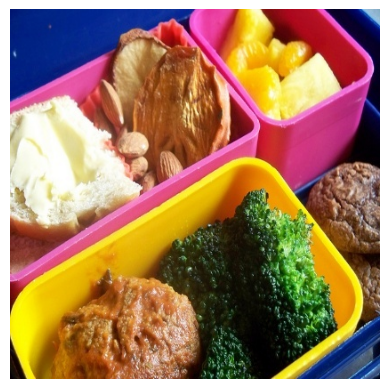

In [6]:
from matplotlib import pyplot as plt

# Display the output image
image_output = cv2.imread("output.jpg")
plt.imshow(cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# **3. Implementing YOLO with TensorFlow/Keras**

In [9]:
!pip install tensorflow  # Install TensorFlow if not already installed

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Download a pretrained YOLO model (or you can train your own)
# For this example, we're using MobileNetV2 as a placeholder
model = MobileNetV2(weights="imagenet")

# Load and preprocess an image
img_path = "datasets/coco/processed/000000000009.jpg"
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = tf.expand_dims(input_arr, axis=0)  # Create batch dimension

# Perform detection (classify with MobileNetV2 as an example)
predictions = model.predict(input_arr)
print("Predictions:", tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions: [[('n03291819', 'envelope', 0.16275658), ('n03938244', 'pillow', 0.13262008), ('n03347037', 'fire_screen', 0.058112532)]]


# **4. Evaluation Metrics**

In [7]:
from sklearn.metrics import precision_score, recall_score

# Suppose we have these predictions and actual labels
y_true = [1, 0, 1, 1, 0, 1]  # Ground truth labels
y_pred = [1, 0, 1, 0, 0, 1]  # Predicted labels

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 1.0
Recall: 0.75
